# The Simple Recurrent Neural Network
## Prepare the Sample Data

In [1]:
import numpy as np
import pandas as pd
loc= "update_COE.csv"
temp = pd.read_csv(loc)

In [2]:
data = temp.drop(temp.columns[[0,1]], axis=1)
y=data['COE$']
x=data.drop(data.columns[[0,4]], axis =1)#drop the first line
x=x.apply(np.log)
x=pd.concat([x, data['Open?']], axis =1)
from sklearn import preprocessing
scaler_x = preprocessing.MinMaxScaler(feature_range=(0,1))
x = np.array(x).reshape(len(x),4)
x = scaler_x.fit_transform(x)
scaler_y = preprocessing.MinMaxScaler(feature_range=(0,1))
y = np.array(y).reshape(len(y),1)
y = np.log(y)
y = scaler_y.fit_transform(y)

# Follow this Approach to Create Your Train and Test Sets
在这个例子中，训练集包含了大约95%的观测值，其余的分配给测试集。

In [3]:
end = len(x)-1
learn_end = int(end * 0.954)
x_train = x[ 0 : learn_end-1, ]
x_test = x[ learn_end : end-1, ]
y_train = y[ 1 : learn_end ]
y_test = y[ learn_end+1 : end ]
x_train = x_train.reshape( x_train.shape + (1, ) )
x_test = x_test.reshape( x_test.shape + (1, ) )

In [4]:
x_train.shape

(250, 4, 1)

In [5]:
x_test.shape

(12, 4, 1)

In [6]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers.core import Dense,Activation
from keras.layers.recurrent import SimpleRNN 

第一行导入Keras序列模型。它允许层的线性堆叠。
我们的说明使用随机梯度衰减进行优化（见第59页），因此我们从keras.optimizers导入SGD。
第三行导入激活函数和一个致密层，这是一个常规的全连接神经网络层。我们用它来做输出层。
最后一行导入一个全连接的RNN，输出要反馈给输入。
## Determine Model Structure

In [8]:
seed = 2020
np.random.seed( seed )
fit1 = Sequential()
fit1.add(SimpleRNN(units=8 , activation="tanh", input_shape=(4 , 1)))
fit1.add(Dense(units=1 , activation='linear'))

- 模型存储在fit1中。每一层都是通过添加函数添加的。它由一个具有8个延迟节点的RNN组成，具有tanh激活函数。
- input_shape参数取特征数（本例中为4）和时间步数（本例中为1）。
- 输出层是一个全连接层，通过线性激活函数有1个输出（我们的COE预测。

## A Complete Intuitive Guide to Momentum

训练神经网络的迭代过程一直持续到误差达到一个合适的最小值。每次迭代所采取的步数大小是由学习率控制的。较大的步数可以减少训练时间，但增加了陷入局部最小值而非全局最小值的可能性。

另一种可以帮助网络走出局部最小值的技术是使用动量项。它的值可以在0到1之间，它将之前的权重更新的这个分数加到当前的权重更新中。如动量参数的数值较高，可以减少训练时间，帮助网络避免陷入局部最小值的陷阱。

然而，将动量参数设置得过高会增加超调全球最低值的风险。如果你把高学习率和大量动量结合起来，会进一步增加这种风险。然而，如果你把动量系数设置得太低，模型将缺乏足够的能量来跳过局部最小值。


In [9]:
sgd = SGD(learning_rate=0.0001, momentum=0.95, nesterov=True)
fit1.compile(loss='mean_squared_error', optimizer=sgd)

注意，我们设置nestrov = True来使用Nesterov的加速梯度下降。这是一种一阶优化方法，旨在提高梯度下降的稳定性和加速收敛。

## Fitting the Model

In [10]:
fit1.fit(x_train, y_train, batch_size=10, epochs=700)

7/700
25/25 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 458/700
25/25 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 459/700
25/25 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 460/700
25/25 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 461/700
25/25 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 462/700
25/25 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 463/700
25/25 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 464/700
25/25 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 465/700
25/25 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 466/700
25/25 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 467/700
25/25 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 468/700
25/25 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 469/700
25/25 [===

In [11]:
score_train = fit1.evaluate(x_train, y_train, batch_size=10)
score_test = fit1.evaluate(x_test, y_test, batch_size=10)

2/2 [==============================] - 0s 2ms/step - loss: 6.9274e-04


In [12]:
score_train

0.003064921125769615

In [13]:
score_test

0.000692738511133939

In [14]:
pred1 = fit1.predict(x_test)
pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1),1)))
pred1 = np.exp(pred1)
np.rint(pred1)

array([[13330.],
       [12216.],
       [12120.],
       [12407.],
       [14108.],
       [14960.],
       [16376.],
       [15223.],
       [13789.],
       [13302.],
       [14839.],
       [15158.]], dtype=float32)

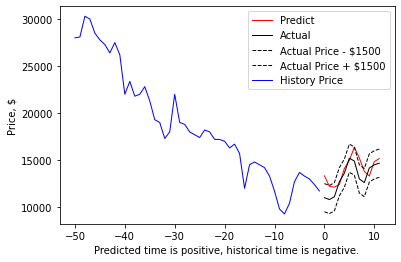

In [15]:
import matplotlib.pyplot as plt
real = np.array(data['COE$'])[0:263].reshape(-1)
# 测试实际值
test_reals = data['COE$'][251:263].tolist()
history_time_length = 50
ahead = 12
plt.plot(range(0, ahead), pred1, '-r', label=u"Predict", linewidth=1)
plt.plot(range(0, ahead), test_reals[0:ahead], color='black', label=u"Actual", linewidth=1)
plt.plot(range(0, ahead), np.array(test_reals[0:ahead]) - 1500, '--k',
             label=u"Actual Price - $1500", linewidth=1)
plt.plot(range(0, ahead), np.array(test_reals[0:ahead]) + 1500, '--k',
             label=u"Actual Price + $1500", linewidth=1)
plt.plot(range(-history_time_length, 0),
             real[len(real) - ahead - history_time_length - 1: len(real) - ahead - 1], '-b', label=u"History Price", linewidth=1)
plt.xlabel(u"Predicted time is positive, historical time is negative.")
plt.ylabel(u"Price, $")
plt.legend()
fig = plt.gcf()
plt.show()